In [20]:
from transformer import *
from tokeniser import Tokeniser 
from load_text import load_prideandprejudice, load_warandpeace
from tok2vec import tok2Vec
import matplotlib.pyplot as plt

# Define variables

In [25]:
seq_len = 128    #Length of the input sequence to the transformer
vec_dim = 150    #Dimension of the embedding vectors
window_size = 8  #Size of the window for the tok2vec model
embedding_epochs = 5  #Number of epochs to train the embedding for
transformer_epochs = 5      #Number of epochs to train the transformer for
text_length = 800000 # / 121810 / 700000
vocab_size = 1000
embedding_type = "TOK2VEC" # BERT, TOK2VEC, ONEHOT
method = "skipgram"
dataset = "warandpeace" # warandpeace, prideandprejudice
load_embedding = True

tokeniser_filename= f'vocab/vocab_{vocab_size}_{dataset}.json'
tok2vec_savename = f'tok2vec_{vocab_size}_{vec_dim}_{text_length}_{window_size}_{embedding_epochs}_{method}_{dataset}'
transformer_savename = f'transformer_{seq_len}_{embedding_type}_{transformer_epochs}_{tok2vec_savename}'

# Load text for training  
print("Loading " + dataset + "...")
if dataset == "prideandprejudice":
    text = load_prideandprejudice(max_words=text_length)
elif dataset == "warandpeace":
    text = load_warandpeace(max_words=text_length)

Loading warandpeace...


# Create tokens

In [26]:
# Train/Load tokeniser
if os.path.exists(tokeniser_filename):
    print("Loading tokeniser from '%s'..." % (tokeniser_filename))
    tokeniser = Tokeniser.load(tokeniser_filename)
else:
    # Create a new tokeniser, train it on the text and save it to disk
    tokeniser = Tokeniser(vocab_size=vocab_size)
    print("Building BPE tokeniser...")
    tokeniser.train(text, verbose=True)
    print("Saving tokeniser to '%s'..." % (tokeniser_filename))
    tokeniser.save(tokeniser_filename)
print("Converting training text to tokens...")
ids = tokeniser.encode(text, verbose=True)  


  0% (0 of 929) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--


Loading tokeniser from 'vocab/vocab_1000_warandpeace.json'...
Converting training text to tokens...


  0% (1 of 929) |                        | Elapsed Time: 0:00:00 ETA:   0:02:14
  0% (3 of 929) |                        | Elapsed Time: 0:00:00 ETA:   0:01:51
  0% (5 of 929) |                        | Elapsed Time: 0:00:00 ETA:   0:01:42
  0% (6 of 929) |                        | Elapsed Time: 0:00:00 ETA:   0:01:41
  0% (8 of 929) |                        | Elapsed Time: 0:00:00 ETA:   0:01:37
  1% (10 of 929) |                       | Elapsed Time: 0:00:00 ETA:   0:01:30
  1% (12 of 929) |                       | Elapsed Time: 0:00:01 ETA:   0:01:25
  1% (14 of 929) |                       | Elapsed Time: 0:00:01 ETA:   0:01:22
  1% (16 of 929) |                       | Elapsed Time: 0:00:01 ETA:   0:01:22
  1% (18 of 929) |                       | Elapsed Time: 0:00:01 ETA:   0:01:19
  2% (20 of 929) |                       | Elapsed Time: 0:00:01 ETA:   0:01:16
  2% (22 of 929) |                       | Elapsed Time: 0:00:01 ETA:   0:01:14
  2% (24 of 929) |                      

# Do Word 2 Vec

### Get Embeddings and save them to file

In [27]:
# Train/Load the embedding
print("Training/Loading embedding...")
w_tok2vec, history = tok2Vec(vocab_size, ids, 
              window_size, vec_dim, 
              embedding_epochs, 
              method=method, 
              savename=tok2vec_savename, 
              load_from_file=load_embedding)
print("Embedding shape: " + str(w_tok2vec.shape))

Training/Loading embedding...
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 150)               150000    
                                                                 
 dense_31 (Dense)            (None, 1000)              150000    
                                                                 
Total params: 300000 (1.14 MB)
Trainable params: 300000 (1.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
4570/4570 [==============================] - 27s 6ms/step - loss: 5.5202 - accuracy: 0.0982 - val_loss: 5.5895 - val_accuracy: 0.0893
Epoch 2/5
4570/4570 [==============================] - 28s 6ms/step - loss: 5.3950 - accuracy: 0.1013 - val_loss: 5.5779 - val_accuracy: 0.0888
Epoch 3/5
4570/4570 [==============================] - 28s 6ms/step - loss: 5.3651 - accuracy: 

/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Plotting word vectors in 2D using t-SNE...


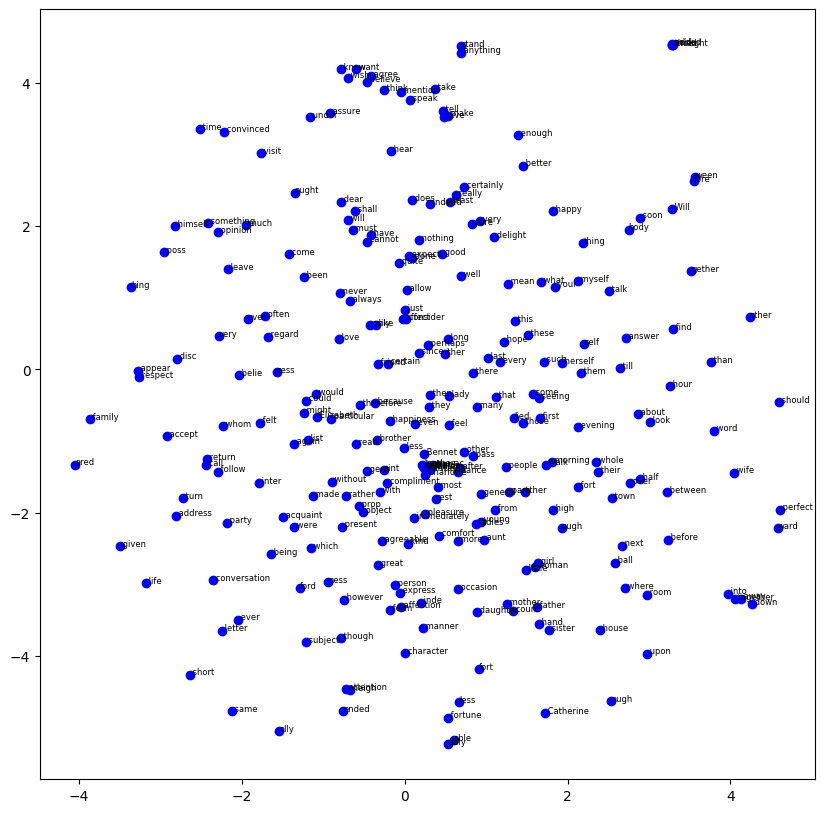

In [29]:
from tokeniser import plot_tok2vec
plot_tok2vec(w_tok2vec, tokeniser.word_index, num_words_to_show=500, figsize=(10, 10), fontsize=6)

# Transformer

In [1]:
n = len(ids)
train_ids = ids[:int(0.9*n)]
valid_ids = ids[int(0.9*n):]

# Create a data generator
print("Loading data generator...")
train_data = predictTextDataGenerator(ids=train_ids, seq_len=seq_len, batch_size=32)
valid_data = predictTextDataGenerator(ids=valid_ids, seq_len=seq_len, batch_size=32)

transformer = Transformer.load(f'transformer_{seq_len}_{embedding_type}_{transformer_epochs}_{tok2vec_savename}')
transformer.predict("It is a truth universally acknowledged", tokeniser)

NameError: name 'ids' is not defined